In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import keras

from keras.models import Model
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Input, UpSampling2D

print(keras.__version__)

Using TensorFlow backend.


2.2.4


In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
# normalize train data
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# normalize test data (which serves as our labels)
x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_test.shape)

(10000, 28, 28, 1)


In [0]:
# create noisy data for train and test
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [0]:
# renormalize through clipping
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [8]:
# create the encode network
input_img = Input(shape=(28,28,1))
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(input_img)
x = MaxPooling2D((2,2),border_mode='same')(x)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(x)
encoded = MaxPooling2D((2,2),border_mode='same')(x)
# 7,7,32

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  """


In [9]:
# create the decode network
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Convolution2D(1,3,3,activation='sigmoid',border_mode='same')(x)
#back to 28,28,1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), padding="same", activation="sigmoid")`
  """


In [10]:
# create the autoencoder by tying the encode and decode networks together
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [11]:
# train
autoencoder.fit(x_train_noisy, x_train,
  nb_epoch=10,
  batch_size=256,
  shuffle=True,
  validation_data=(x_test_noisy, x_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2064 - val_loss: 0.1267
Epoch 2/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1217 - val_loss: 0.1162
Epoch 3/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1146 - val_loss: 0.1108
Epoch 4/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1106 - val_loss: 0.1077
Epoch 5/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1079 - val_loss: 0.1062
Epoch 6/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1061 - val_loss: 0.1048
Epoch 7/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1049 - val_loss: 0.1034
Epoch 8/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1039 - val_loss: 0.1027
Epoch 9/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1031 - val_loss: 0.1

In [12]:
# create the encoder model
encoder = Model(input=input_img, output=encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [13]:
# create the decoder model
encoded_input = Input(shape=(7,7,32))

# this is pretty ugly. is there a better way? like layer.pop?
decoder1 = autoencoder.layers[-5]
decoder2 = autoencoder.layers[-4]
decoder3 = autoencoder.layers[-3]
decoder4 = autoencoder.layers[-2]
decoder5 = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder5(decoder4(decoder3(decoder2(decoder1(encoded_input))))))
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         289       
Total params: 18,785
Trainable params: 18,785
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [14]:
# run noisy test data through the encoder
encoded_imgs = encoder.predict(x_test_noisy)

# run encoded noisy test image back through the decoder
decoded_imgs = decoder.predict(encoded_imgs)

# make sense of the shapes
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 7, 7, 32)
(10000, 28, 28, 1)


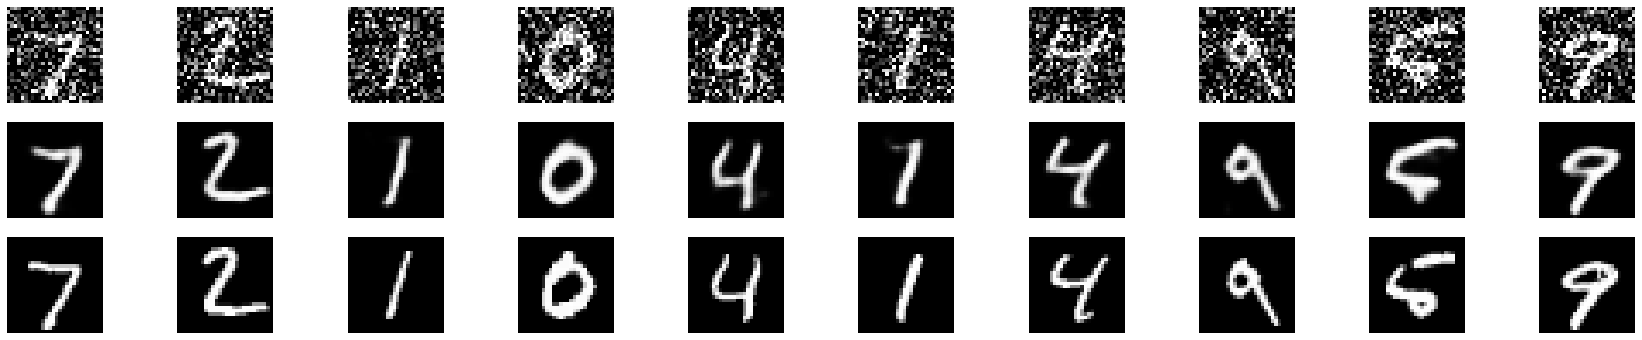

In [15]:
# display the images
n = 10
plt.figure(figsize=(30,6))
for i in range(n):
  # noisy images
  ax = plt.subplot(3,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # denoised images
  ax = plt.subplot(3,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # original images
  ax = plt.subplot(3,n,i+1+n*2)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()